In [1]:
import torch
from utils import * 
from targets import * 

In [2]:
N_D = 10000
prior_distribution = torch.distributions.MultivariateNormal(4*torch.ones(1), torch.eye(1))
D_theta = prior_distribution.sample([N_D])

target = DeformedCircles()
D_x = target.sample(D_theta)

In [3]:
from conditional_density_estimation import * 

In [4]:
model = ConditionalDIF(D_x,D_theta,50, [16,16])
model.train(500,2000, verbose = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [16:11<00:00,  1.94s/it, loss = 4.902852 ; device: cpu]


tensor([4.1685])


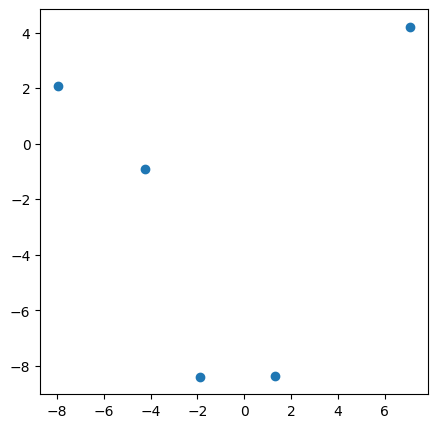

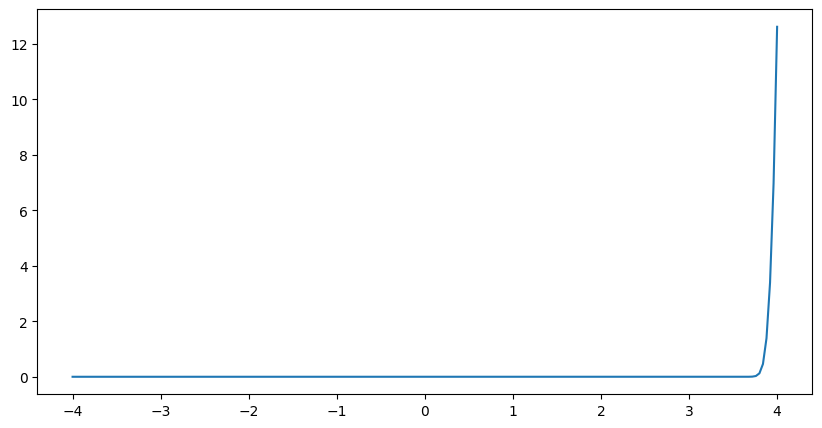

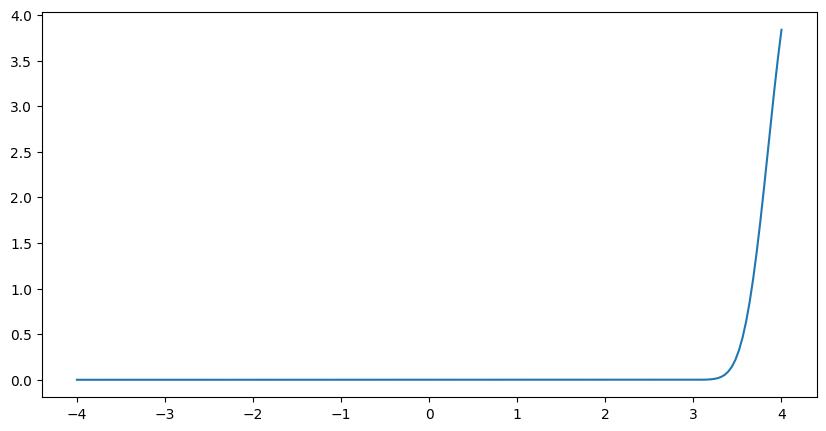

In [8]:
N_obs = 5
theta0 = prior_distribution.sample()
print(theta0)
x0 = target.sample(theta0.repeat(N_obs,1))
plot_2d_points(x0, figsize=(5,5))
plt.show()
model_posterior = lambda samples: prior_distribution.log_prob(samples) + torch.sum(model.log_prob(x0.unsqueeze(0).repeat(samples.shape[0],1,1), samples.unsqueeze(1).repeat(1, N_obs,1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(model_posterior(samples.unsqueeze(-1))),range=[-4,4],bins=200, figsize = (10,5))
true_posterior = lambda samples: prior_distribution.log_prob(samples) + torch.sum(target.log_prob(x0.unsqueeze(0).repeat(samples.shape[0],1,1), samples.unsqueeze(1).repeat(1, N_obs, 1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(true_posterior(samples.unsqueeze(-1))),range=[-4,4],bins=200,figsize = (10,5))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s, acceptance = tensor(0.1500)]


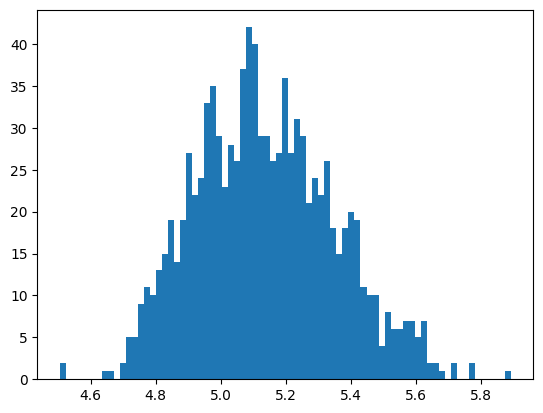

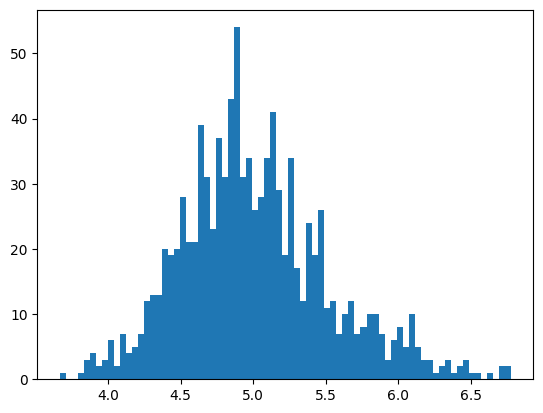

In [6]:
from markov_chain_monte_carlo import * 
model_posterior_samples = IndependentMetropolisHastings(model_posterior,1, prior_distribution, number_chains = 1000).sample(50, verbose = True)
plt.hist(model_posterior_samples.numpy(), bins = 75)
plt.show()
true_posterior_samples = IndependentMetropolisHastings(true_posterior,1, prior_distribution, number_chains = 1000).sample(50)
plt.hist(true_posterior_samples.numpy(), bins = 75)
plt.show()

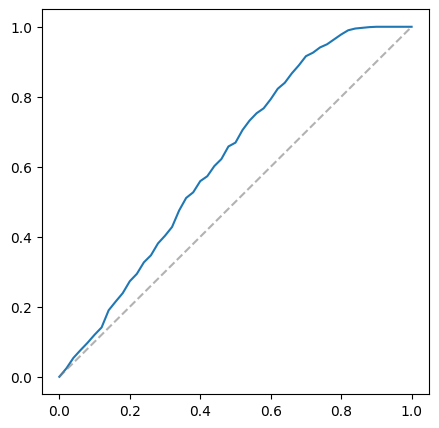

In [7]:
plot_expected_coverage_1d_samples(true_posterior_samples, model_posterior_samples)